# EDA Mail Campaign

1. Query the database to get historical transactions from January to current date on customers who recieved the email
2. Create a new worksheet by using vlookup to join the historical records to opens, clicks and suscribes for the relevent customer.
3. Clean the data
4. Mail interaction
5. Impact of mail campaign

In [125]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [142]:
SIZE = 22
matplotlib.rc('font', size=SIZE)
matplotlib.rc('axes', titlesize=SIZE)

In [127]:
mail_path = pd.read_csv('C:/Users/Damie/OneDrive/Desktop/python_files/kaggle_data_sets/Harley/mail_campaign-LAPTOP-K6D8RSOU.csv')
mc = mail_path

C:\Users\Damie\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [128]:
conn = sqlite3.connect('C:/Users/Damie/OneDrive/Desktop/python_files/kaggle_data_sets/Harley/mail_campaign.db')
mc.to_sql('mail', conn, if_exists='replace', index=False)
e = pd.read_sql_query


C:\Users\Damie\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:2663: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


# 3. Clean the data

In [129]:
print (mc.dtypes)
print (mc.isna().sum())

email_id                   object
Unsuscribe                 object
URL                        object
Clicks                    float64
Opens                     float64
Member Rating               int64
Date of first delivery     object
Lifetime Value            float64
Date of last delivery      object
Date of first order        object
Date of sign up            object
First Name                 object
history_user_id           float64
history_date               object
history_quantity          float64
history_transaction        object
region_id                 float64
dtype: object
email_id                       0
Unsuscribe                546255
URL                       334899
Clicks                    334899
Opens                     178419
Member Rating                  0
Date of first delivery         0
Lifetime Value                 0
Date of last delivery          0
Date of first order            0
Date of sign up                0
First Name                     2
history_user

In [130]:
### Clean the data
mc_replace = {'Unsuscribe': False, 'URL': 'None', 'Clicks': 0, 'Opens':0,
              'First Name': 'None','history_user_id':0, 'history_date':'None',
              'history_quantity':'0', 'history_transaction':'None', 'region_id':0}

In [131]:
mc = mc.fillna(mc_replace)

print (mc.isna().sum())

email_id                  0
Unsuscribe                0
URL                       0
Clicks                    0
Opens                     0
Member Rating             0
Date of first delivery    0
Lifetime Value            0
Date of last delivery     0
Date of first order       0
Date of sign up           0
First Name                0
history_user_id           0
history_date              0
history_quantity          0
history_transaction       0
region_id                 0
dtype: int64


# 4. Mail Interaction

In [132]:
emails_sent = e('''
                    select count(distinct email_id) as total
                    from mail
                    
                    ''', conn)
print ('Number of customers the email was sent out to =', emails_sent['total'].item())

Number of customers the email was sent out to = 14326


In [133]:
emails_opened = e('''
                    select count(distinct email_id) as total
                    from mail
                    where Opens > 0
                    
                    ''', conn)

print ('Number of customers who opened the email =', emails_opened['total'].item())

Number of customers who opened the email = 9197


In [134]:
emails_clicked = e('''
                    select count(distinct email_id) as total
                    from mail
                    where Clicks > 0
                    
                    ''', conn)

print ('Number of customers who clicked the link at least once', emails_clicked['total'].item())

Number of customers who clicked the link at least once 5018


# 5. Mail Campaign Impact

**We want to investigate what kind of impact the mail campaign had, we will analyse;**

1. Click/open ratio.
2. Whether quantities of items increased significantly during the period of the campaign. 
3. Did custom orders turn into more subscriptions.
4. Re-engagement of stalled customers.

## 5.1. Click/open ratio

In [135]:
print (emails_opened['total']/emails_sent['total'])

0    0.64198
Name: total, dtype: float64


64% of customers who receieved the email opened the email

In [136]:
print (emails_clicked['total']/emails_opened['total'])

0    0.545613
Name: total, dtype: float64


54% of customers who opened the email went ahead to click the link within the email

A Click/Open ratio of 0.54 is a good amount, the average for mail campaigns is usually around ~25%

## 5.2. How has the requested quantity of items per week been affected by the mail campaign 
    - Prepare the control group - No engagement with the email
    - Prepare a population who opened the email but did not click a URL
    - Prepare a population who opened the email and did click a URL
    - Compare the open email population with the control group
    - Compare the click population with the control group
    - Compare the click population with open email population

First, we need to do some formatting on the history_date, this way we can breakdown the data on a week by week basis.

In [137]:
### Format history dates 
mc['history_month'] = mc['history_date'].str[3:-5]
mc['history_month'] = mc['history_month'].replace('01', 'January')
mc['history_month'] = mc['history_month'].replace('02', 'February')
mc['history_month'] = mc['history_month'].replace('03', 'March')
mc['history_month'] = mc['history_month'].replace('04', 'April')
mc['history_days'] = mc['history_date'].str[:-8] 
mc['history_days'] = mc['history_days'].str.lstrip('0')
mc['history_days'] = mc['history_days'].replace('1','1')
mc['history_days'] = mc['history_days'].replace('2','1')
mc['history_days'] = mc['history_days'].replace('3','1')
mc['history_days'] = mc['history_days'].replace('4','1')
mc['history_days'] = mc['history_days'].replace('5','1')
mc['history_days'] = mc['history_days'].replace('6','1')
mc['history_days'] = mc['history_days'].replace('7','1')
mc['history_days'] = mc['history_days'].replace('8','1')
mc['history_days'] = mc['history_days'].replace('9','2')
mc['history_days'] = mc['history_days'].replace('10','2')
mc['history_days'] = mc['history_days'].replace('11','2')
mc['history_days'] = mc['history_days'].replace('12','2')
mc['history_days'] = mc['history_days'].replace('13','2')
mc['history_days'] = mc['history_days'].replace('14','2')
mc['history_days'] = mc['history_days'].replace('15','2')
mc['history_days'] = mc['history_days'].replace('16','3')
mc['history_days'] = mc['history_days'].replace('17','3')
mc['history_days'] = mc['history_days'].replace('18','3')
mc['history_days'] = mc['history_days'].replace('19','3')
mc['history_days'] = mc['history_days'].replace('20','3')
mc['history_days'] = mc['history_days'].replace('21','3')
mc['history_days'] = mc['history_days'].replace('22','3')
mc['history_days'] = mc['history_days'].replace('23','3')
mc['history_days'] = mc['history_days'].replace('24','3')
mc['history_days'] = mc['history_days'].replace('25','4')
mc['history_days'] = mc['history_days'].replace('26','4')
mc['history_days'] = mc['history_days'].replace('27','4')
mc['history_days'] = mc['history_days'].replace('28','4')
mc['history_days'] = mc['history_days'].replace('29','4')
mc['history_days'] = mc['history_days'].replace('30','4')
mc['history_days'] = mc['history_days'].replace('31','4')

mc.to_sql('mail', conn, if_exists='replace', index=False)

To get some indication of whether the mail campaign had any effect we need a baseline comparison, to do this we have collected the historical data from customers from the beginning of 2020 and we will measure the change in behaviour.

In [138]:
quantity_items = e('''
                      select sum(history_quantity) as total, history_month, history_days
                      from mail
                      where history_user_id > 0
                      group by history_month, history_days
                      order by history_month
                      
                      ''', conn)
  
order_months = ['January', 'February', 'March', 'April']
quantity_items['history_month'] = pd.Categorical(quantity_items['history_month'], categories=order_months)
quantity_items = quantity_items.sort_values(by='history_month')

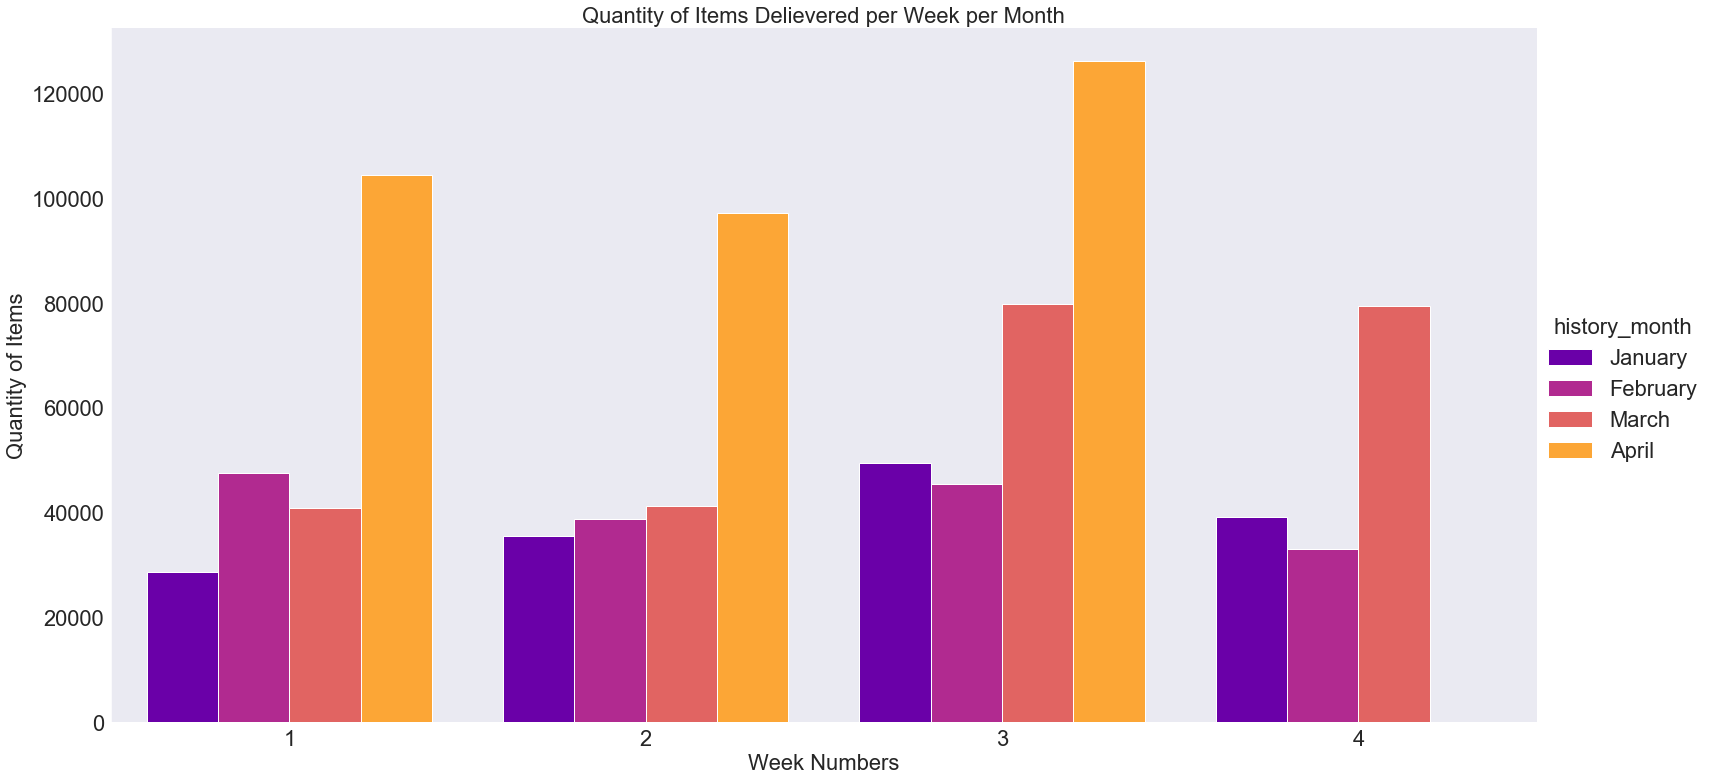

In [143]:
chart = sns.catplot(x='history_days', y='total', hue='history_month',kind='bar',data=quantity_items, saturation=1,palette='plasma', height=11, aspect=2)
chart.set_axis_labels('Week Numbers', 'Quantity of Items')
plt.title('Quantity of Items Delievered per Week per Month')
plt.show()

*Figure 1*

This figure shows the overall trend in the quantity of items requested per week by customers who were part of the mail campaign, regardless of whether they opened the email or interacted with the link.
The trend is clear, a sharp increase in the quantity of items requested in March indicating the announcement of the lock-down protocol. As this data specifically concerns only the customers sen the email we can be sure the increase seen is not due to the influx of new customers as I showed in the previous exercise.

Now we will discriminate the same data between those opened the email and those who did not. 

In [144]:
print (emails_sent['total']-emails_opened['total'])

0    5129
Name: total, dtype: int64


- 5129 did not open the mail
- 9197 customers opened the mail
- 4179 opened the mail but did not click the link
- 5018 opened the mail and clicked the link

**Control population (No engagement with email)**

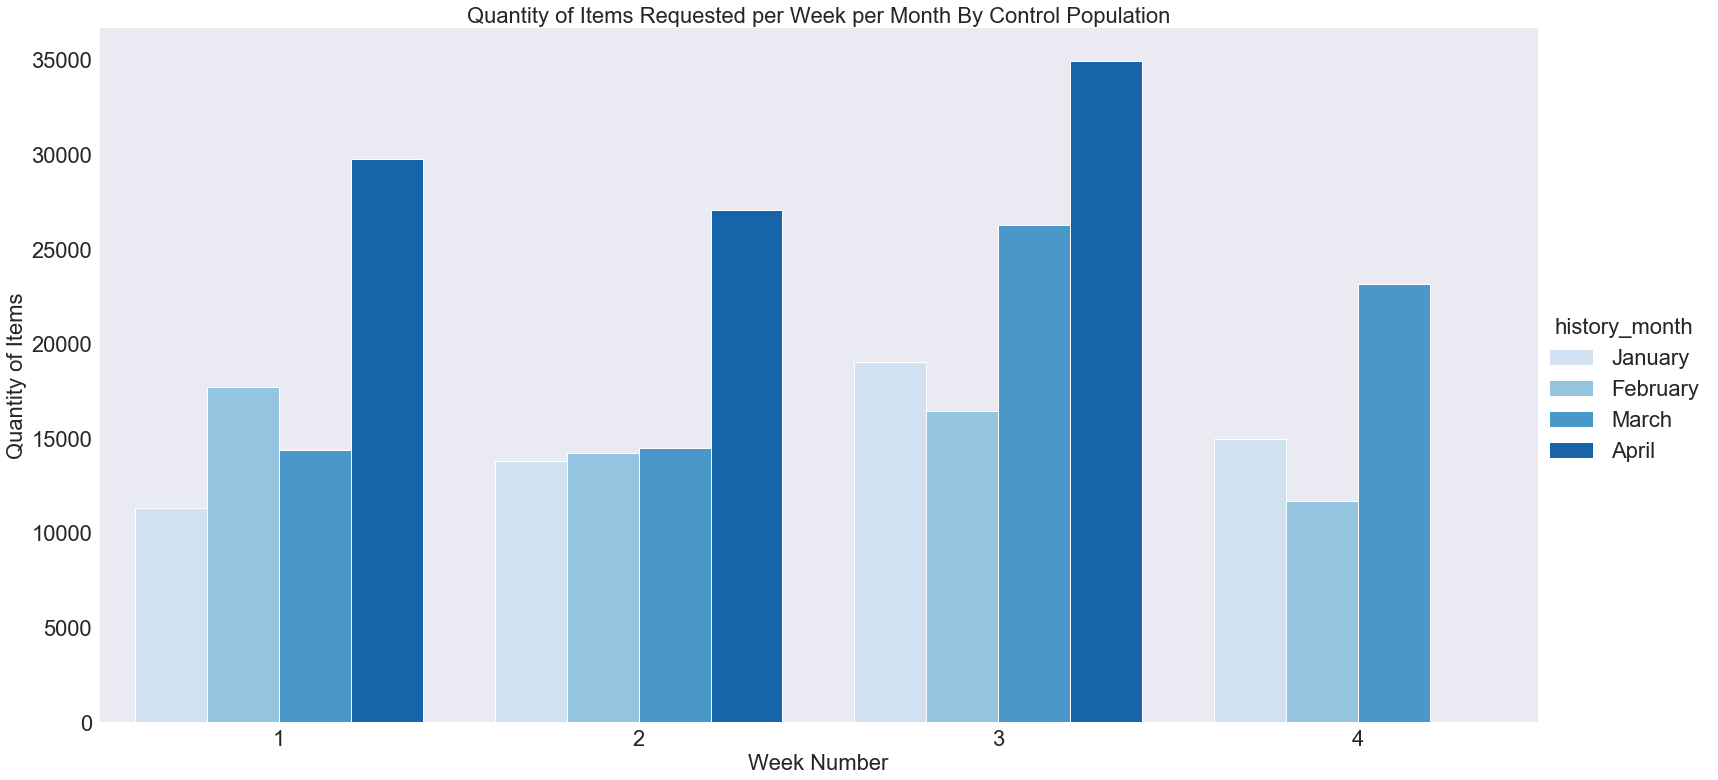

In [145]:
quantity_items_notopen = e('''
                      select sum(history_quantity) as total, history_month, history_days
                      from mail
                      where history_user_id > 0 and Opens = 0
                      group by history_month, history_days
                      order by history_month
                      
                      ''', conn) 
                      
quantity_items_notopen['history_month'] = pd.Categorical(quantity_items_notopen['history_month'], categories=order_months)
quantity_items_notopen = quantity_items_notopen.sort_values(by='history_month')

chart = sns.catplot(x='history_days', y='total', hue='history_month',kind='bar',data=quantity_items_notopen, saturation=1,height=11, aspect=2,palette='Blues')
plt.title('Quantity of Items Requested per Week per Month By Control Population')
chart.set_axis_labels('Week Number','Quantity of Items')
plt.show()

*Figure 2*

**Population 1 - Opened the email but did not click URL**

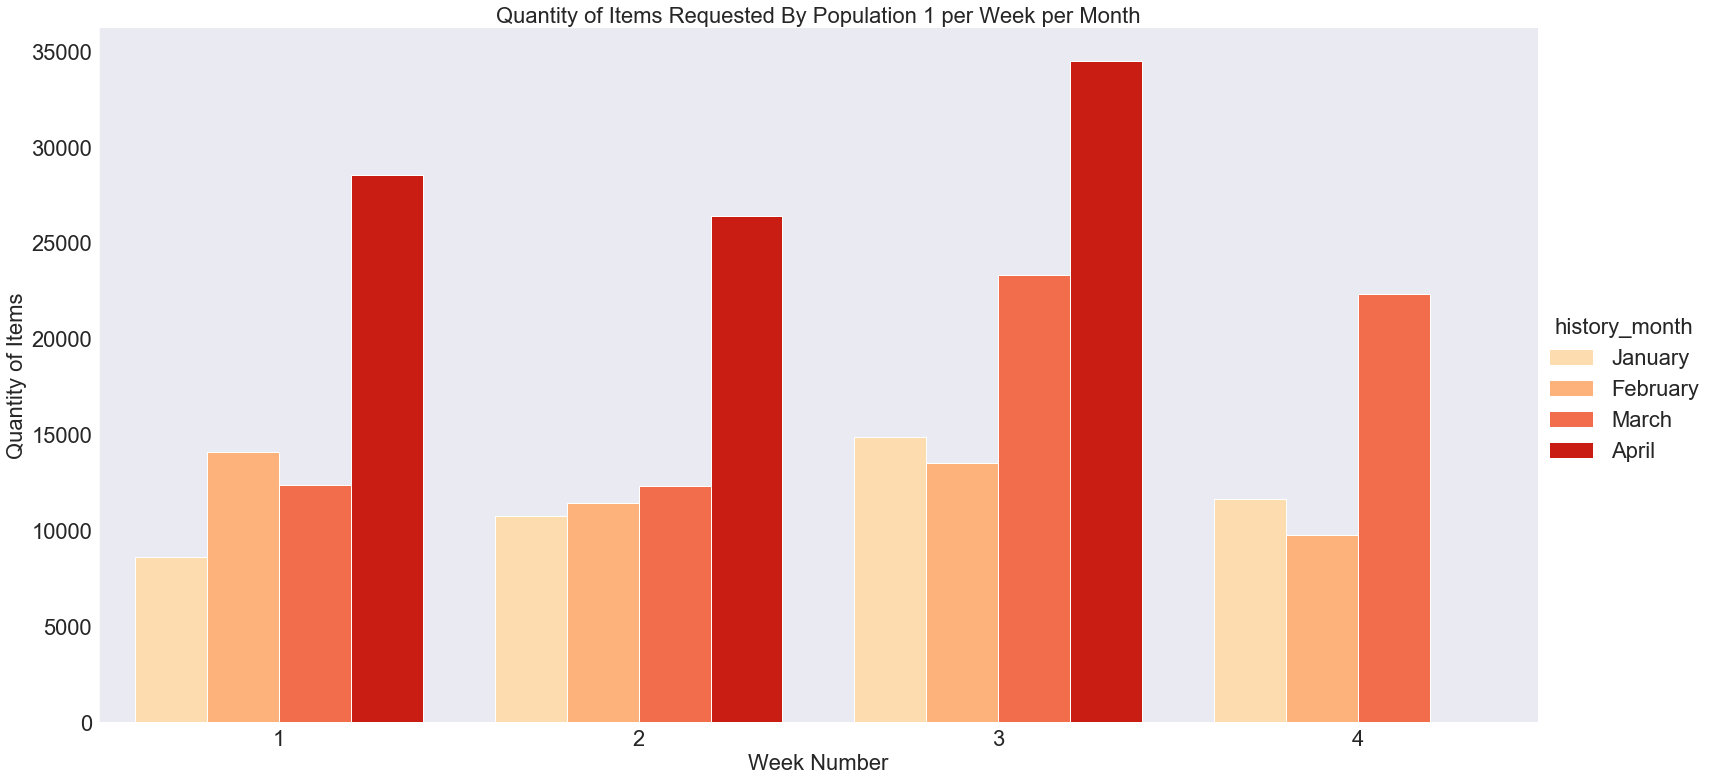

In [146]:
quantity_items_open = e('''
                      select sum(history_quantity) as total, history_month, history_days
                      from mail
                      where history_user_id > 0 and Opens > 0 and Clicks = 0
                      group by history_month, history_days
                      order by history_month
                      
                      ''', conn)  

quantity_items_open['history_month'] = pd.Categorical(quantity_items_open['history_month'], categories=order_months)
quantity_items_open = quantity_items_open.sort_values(by='history_month')

chart = sns.catplot(x='history_days', y='total', hue='history_month',kind='bar',data=quantity_items_open, saturation=1,height=11, aspect=2, palette='OrRd')
plt.title('Quantity of Items Requested By Population 1 per Week per Month')
chart.set_axis_labels('Week Number', 'Quantity of Items')
plt.show()

*Figure 3*

How does the behaviour between the control group and population 1 compare?

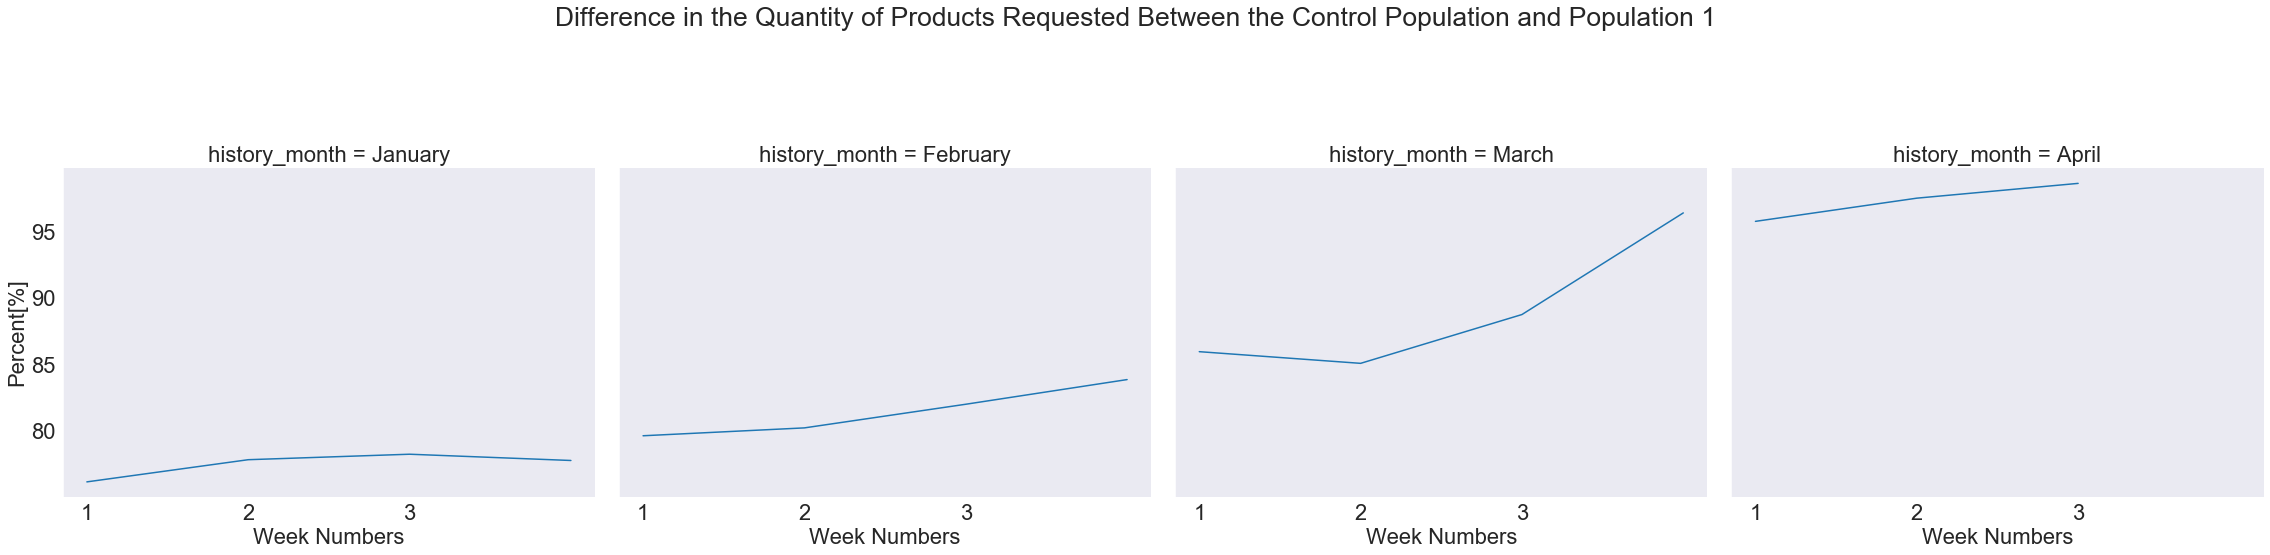

In [151]:
quantity_items_open['percent'] = (quantity_items_open['total'] / quantity_items_notopen['total'])*100

chart = sns.relplot(x='history_days', y='percent', col='history_month', kind='line',data=quantity_items_open, height=8, aspect=1)
plt.subplots_adjust(top = 0.7)
plt.suptitle('Difference in the Quantity of Products Requested Between the Control Population and Population 1')
chart.set_axis_labels('Week Numbers','Percent[%]')
plt.show()

*Figure 4*

The control group is 19% larger than population 1 throughout the timeframe of the data.
The quantity of items delivered to population 1 is ~24% less which correlates well with the discrepancy between the sizes of the population. However, this stays fairly flat until the end of February when the gap between the quantity of items ordered by the two populations beings to close. Figures 2 and 3  shows that the total number of items requested by the respective populations increases but the quantity of items requested by population 1 increases further.
By April, population 1 is ordereing the same quantity of items despite being ~20% smaller than the control group.

**Population 2 - Clicked the URL within the email**

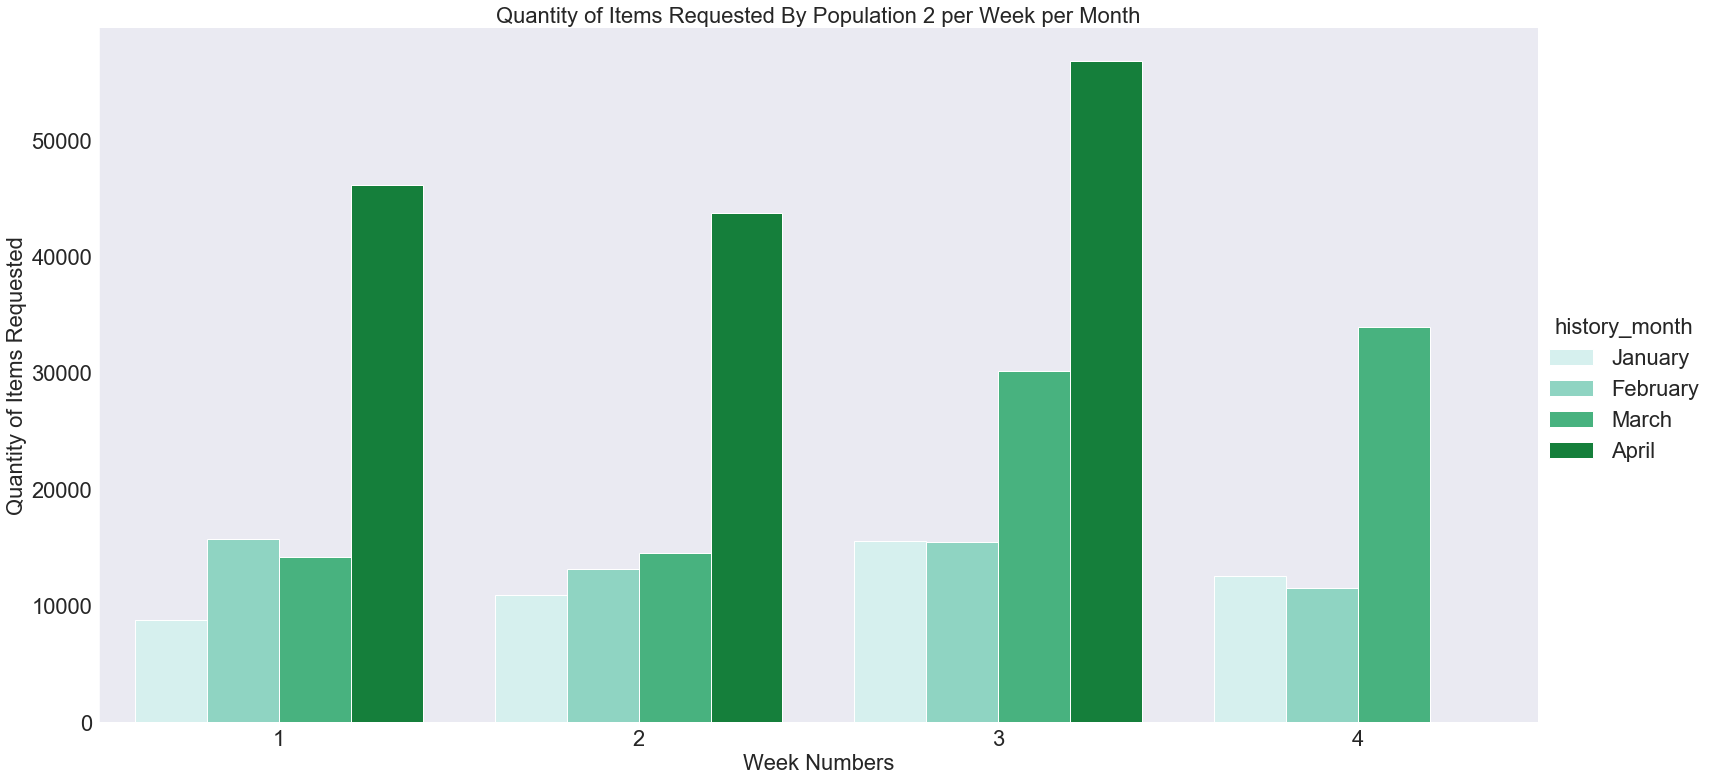

In [152]:
quantity_items_clicks = e('''
                      select sum(history_quantity) as total, history_month, history_days
                      from mail
                      where history_user_id > 0 and Clicks > 0
                      group by history_month, history_days
                      order by history_month
                      
                      ''', conn)  

quantity_items_clicks['history_month'] = pd.Categorical(quantity_items_clicks['history_month'], categories=order_months)
quantity_items_clicks = quantity_items_clicks.sort_values(by='history_month')   

chart = sns.catplot(x='history_days', y='total', hue='history_month',kind='bar', saturation=1, data=quantity_items_clicks, palette='BuGn', height=11, aspect=2)
plt.title('Quantity of Items Requested By Population 2 per Week per Month')
chart.set_axis_labels('Week Numbers','Quantity of Items Requested')
plt.show()

*Figure 5*

This barplot shows the number of items received by population 2.

How does the behaviour of the control group and population 2 compare?

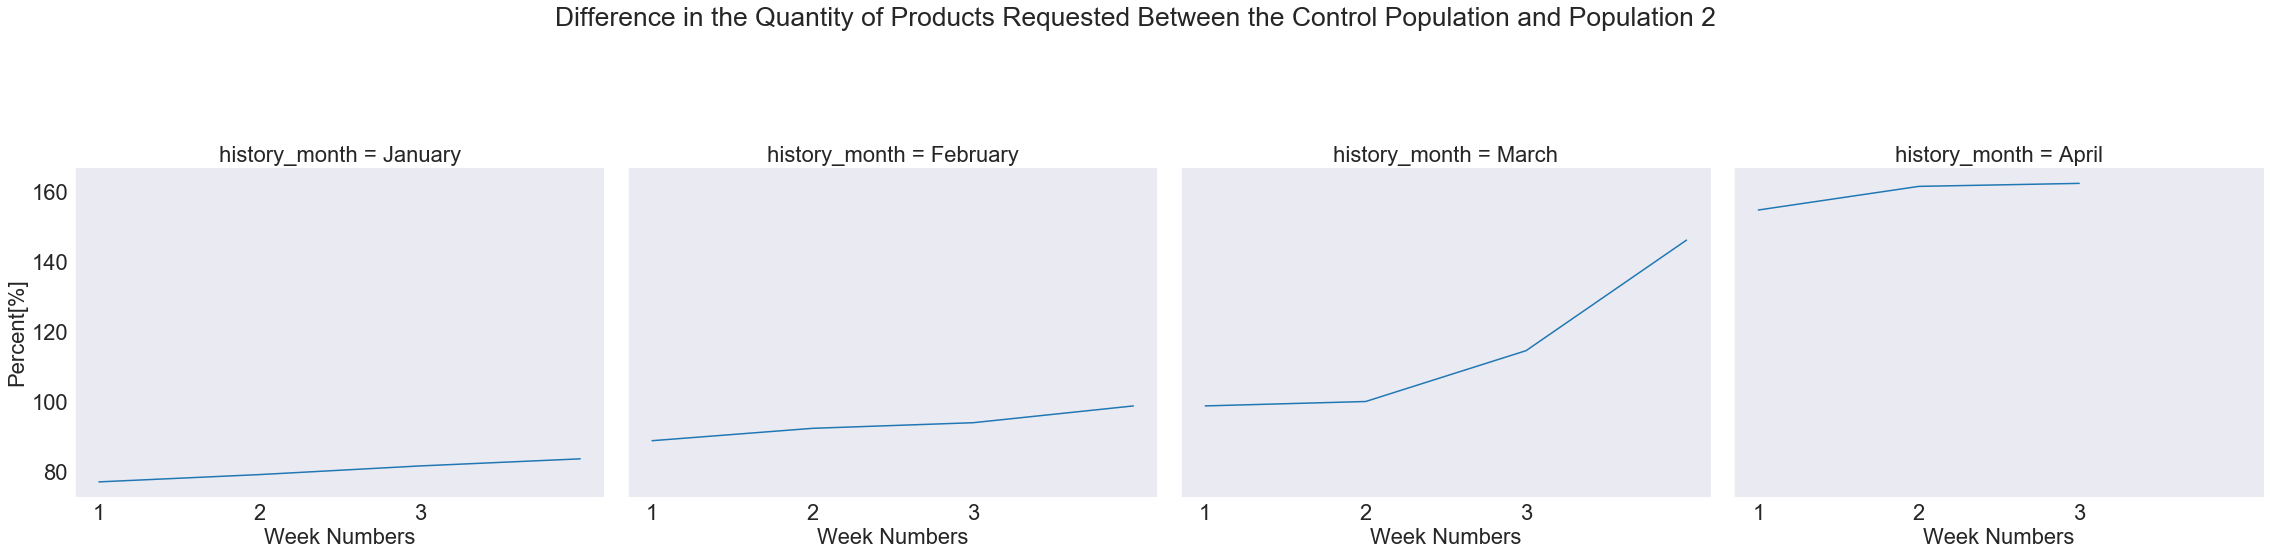

In [163]:
quantity_items_clicks['percent_control'] = (quantity_items_clicks['total']/ quantity_items_notopen['total'])*100

chart = sns.relplot(x='history_days', y='percent_control', col='history_month', kind='line',data=quantity_items_clicks, height=8, aspect=1)

plt.subplots_adjust(top = 0.7)
plt.suptitle('Difference in the Quantity of Products Requested Between the Control Population and Population 2')
chart.set_axis_labels('Week Numbers','Percent[%]')
plt.show()

*Figure 6*

The population sizes for control and population 2 are almost the same, the control population is only 2% bigger. On this alone the fact that population 2 is only 2% smaller and yet during April orders 70% more products is clearly indicative of some extra factor. As both the control group and population 2 have been shown to increase their orders due to the lock-down protocol the discrepency must be due to another factor, namely the mail campaign.

How does the behaviour between population 1 and 2 compare?

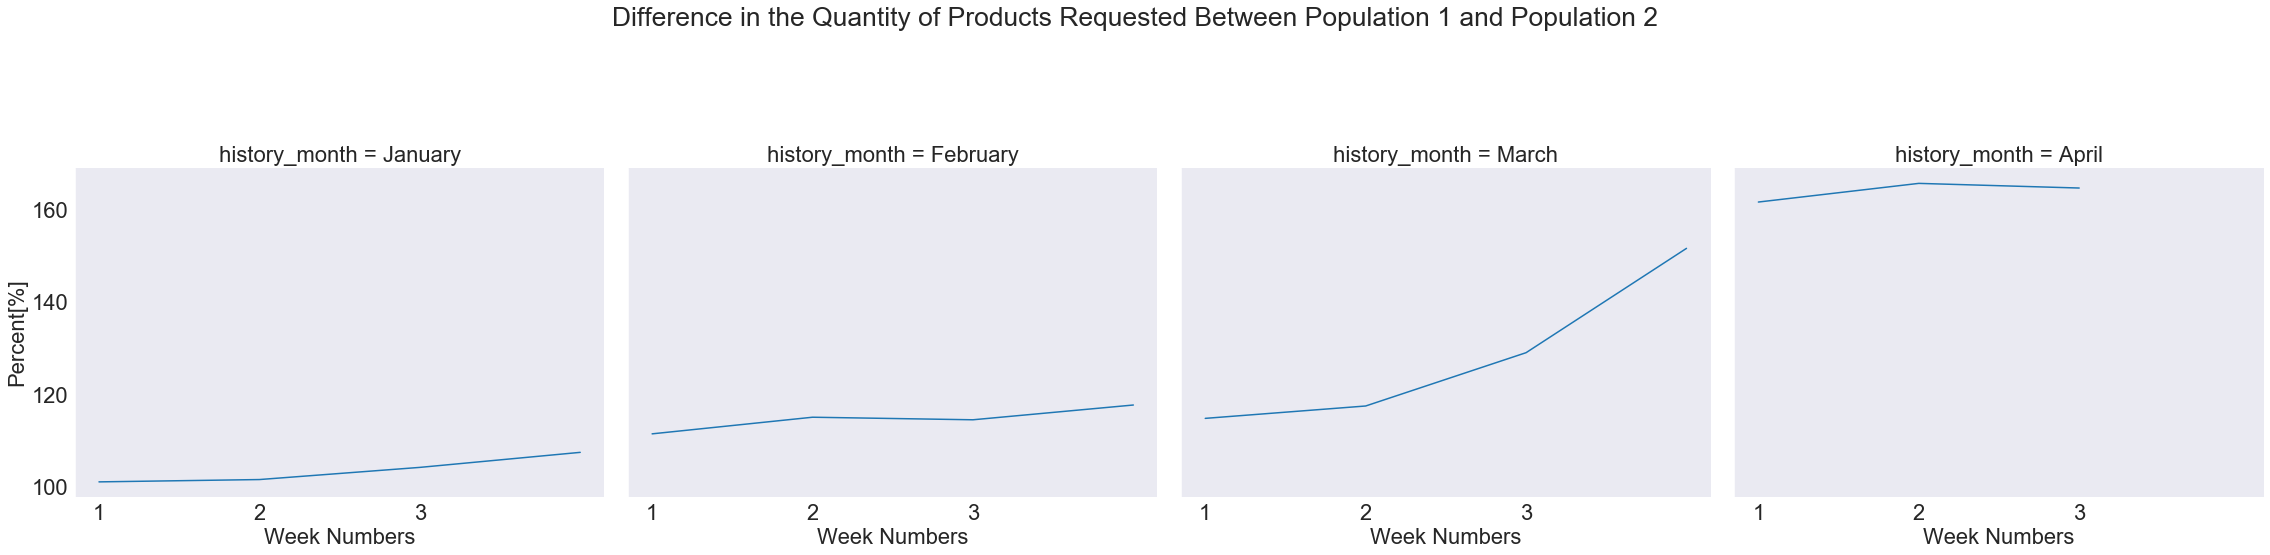

In [166]:
### percentage differences in qauntites of items bought between open and non open customers
quantity_items_clicks['percent'] = (quantity_items_clicks['total'] / quantity_items_open['total'])*100

chart = sns.relplot(x='history_days', y='percent', col='history_month', kind='line',data=quantity_items_clicks, height=8, aspect=1)
plt.subplots_adjust(top = 0.7)
plt.suptitle('Difference in the Quantity of Products Requested Between Population 1 and Population 2')
chart.set_axis_labels('Week Numbers','Percent[%]')
plt.show()

*Figure 7*

Population 2 is 17% larger than population 1, as with figure 4 we would expect to see a discrepency between the quantity of items requested by the two populations indicating the difference in size between population 1 and 2.
Indeed, we do see this same trend again as with figure 4 in the earlier weeks of the year. However, as we go into the end of March we see a very large percentage increase representing the difference between the quantity of items requested by population 2. The rise is indcating that the quantity of products requested by population 2 is far outweighing, 70% larger, that requested by population 1. What is the difference between the two populations other than the 19% difference in population sizes?....Well, population 2, representing the increase in the number of products requested, is the population who fully engaged with the mail campaign.

## 5.3. Did the mail campaign convert custom orders into more subscriptions

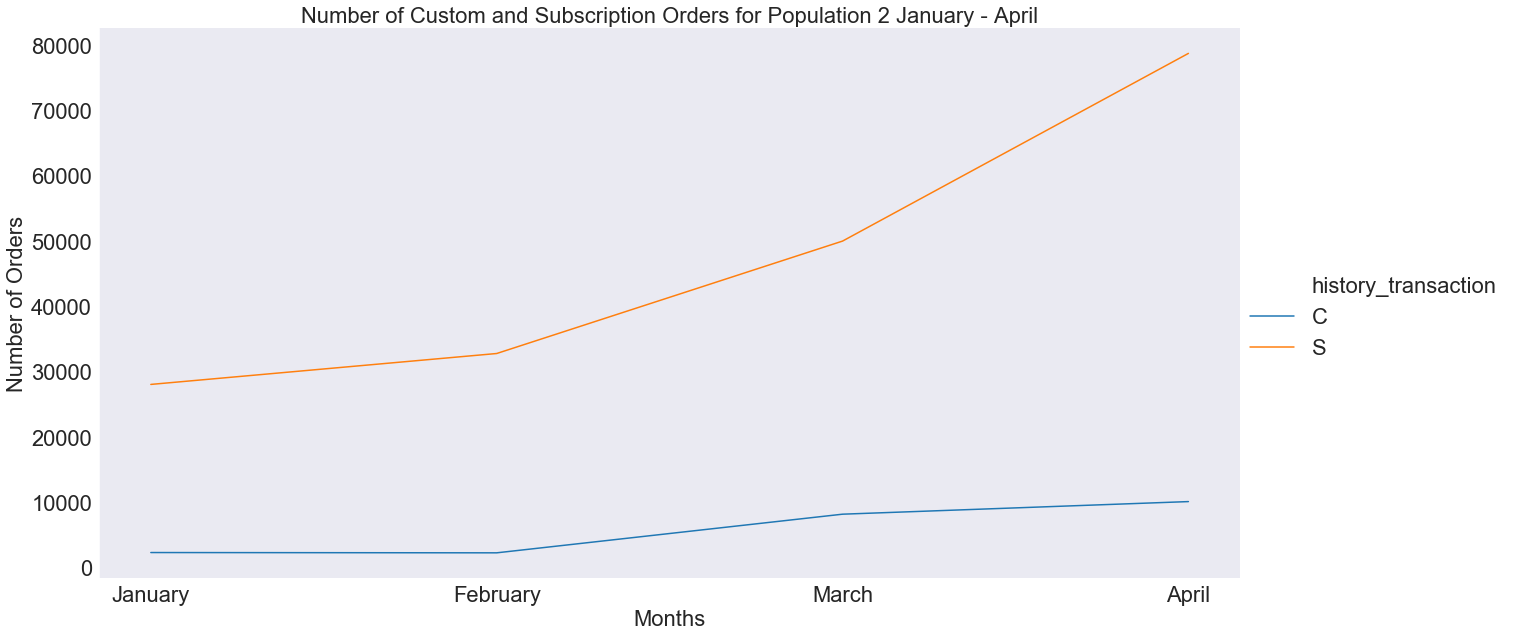

In [170]:
### custom orders to subscripttion ratios
custom = e('''
               select count(history_transaction) as total, history_transaction, history_month
               from mail 
               where history_transaction not like 'None' and Clicks > 0
               group by history_transaction, history_month
               
               ''', conn)
               
custom['history_month'] = pd.Categorical(custom['history_month'], categories=order_months)
custom = custom.sort_values(by='history_month')    
               
chart1 = sns.relplot(x='history_month', y='total', hue='history_transaction', data=custom, kind='line', height=9, aspect=2)
chart1 = sns.set_style(style='dark')
plt.title('Number of Custom and Subscription Orders for Population 2 January - April')
plt.xlabel('Months')
plt.ylabel('Number of Orders')
plt.show()

*Figure 8*

Figure 8 shows the total number of customer orders and subscription orders per month, when we look at March we can see that lock-down protocol has caused a significant increase in the number of subscriotions being placed, however, April sees a much larger shift in the total number of subscription orders being placed.

In [ ]:
print 

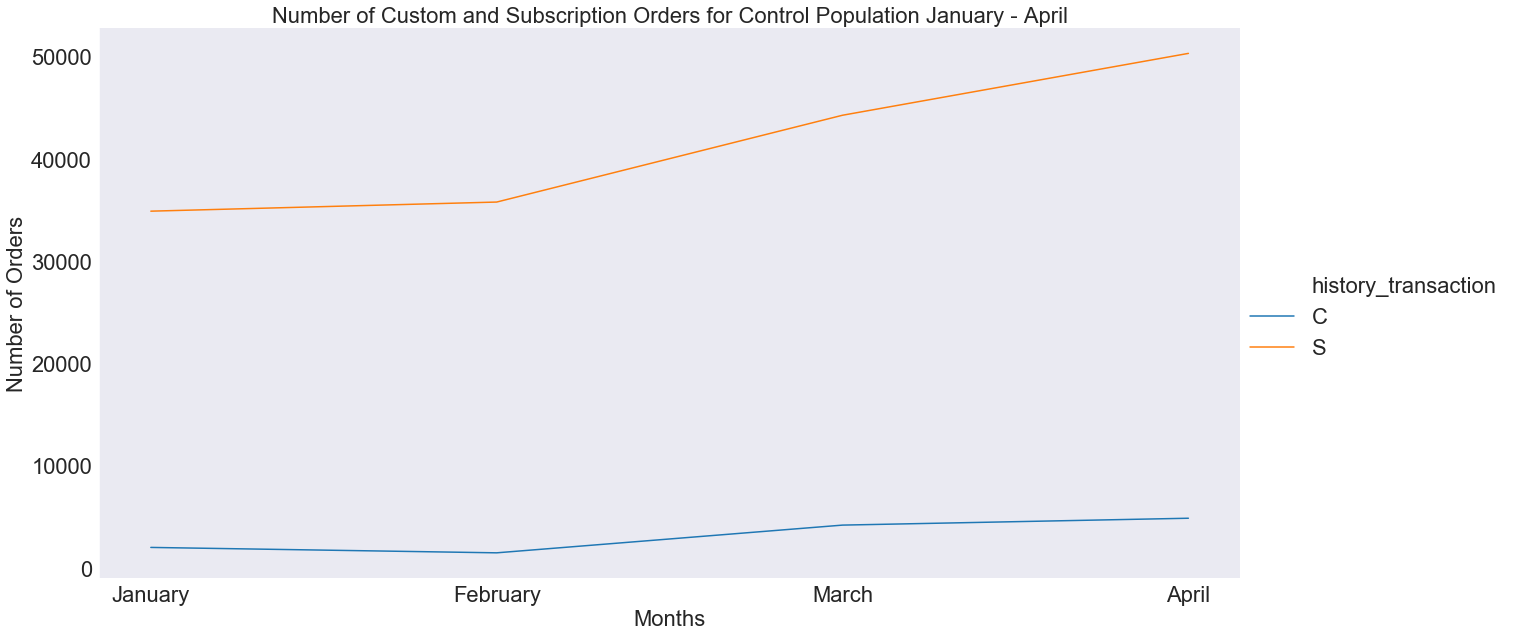

In [171]:
custom_noengage = e('''
               select count(history_transaction) as total, history_transaction, history_month
               from mail 
               where history_transaction not like 'None'  and Opens = 0
               group by history_transaction, history_month
               
               ''', conn)
               
custom_noengage['history_month'] = pd.Categorical(custom_noengage['history_month'], categories=order_months)
custom_noengage = custom_noengage.sort_values(by='history_month')    
   
          
chart1 = sns.relplot(x='history_month', y='total', hue='history_transaction', data=custom_noengage, kind='line', height=9, aspect=2)
chart1 = sns.set_style(style='dark')
plt.title('Number of Custom and Subscription Orders for Control Population January - April')
plt.xlabel('Months')
plt.ylabel('Number of Orders')
plt.show()

*Figure 9*

Although the subscription orders do have a gentle increase at the end of February, it is not as significant as the increase in subscription orders in population 2.

Again we can show that population 2 follows the same overall trend as the control group, i.e that orders on the whole are up due to the lock-down protocol being introduced, but there are differences in the behaviour between the populations. In this section the behaviour is such that subscription orders for population 2 increase significantly, again we will remind ourselves that the purpose of the mail campaign was to increase subscription orders, so any customer that engaged with the email is likely responsible for the increase seen in figure 8. As for the control group there is no significant trend noticeable.

## 5.4. Re-egagment of Customers

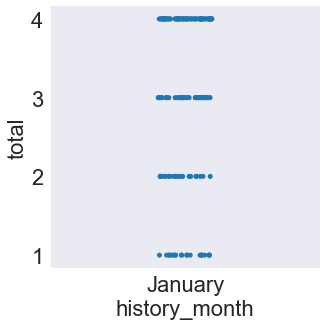

In [172]:
reengage_jan = e('''
             
             select distinct history_user_id as users, count(history_date) as total, history_month, Clicks
             from mail
             where  Clicks > 0 and history_month like 'January' 
             group by history_user_id, history_month
             having count(history_date) <=4
             
             ''', conn)

chart = sns.catplot(x='history_month', y='total', data=reengage_jan)

*Figure 10*

Here we selected only people from population 2 and counted the number of deliveries they had during the month of January where the number of deliveries during January was less than 4, i.e. looking at an average of 1 deliervy per week.

Now we want to compare the number of deliveries those same customers are receicing in April to see if by clicking the URL their delivery structure has changed, i.e. have we increased or encouraged them to increase their weekly deliveries.

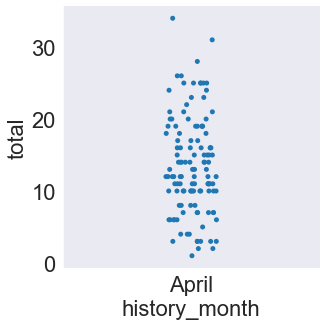

In [173]:
sub = e('''
        
            select distinct history_user_id, count(history_date) as total, history_month
            from mail
            where history_user_id in 
            (
            select distinct history_user_id
             from mail
             where  Clicks > 0 and history_month like 'January' 
             group by history_user_id, history_month
             having count(history_date) <=4
             
             )
            and history_month like 'April'
            group by history_user_id
             ''', conn) 

chart = sns.catplot(x='history_month',y='total', data=sub)

*Figure 11*

Figure 11 indicates that the average number of deliveries of the 'disengaged' customers has indeed increased dramatically.

In [180]:
print ('Number of customers with 4 or less deliveries throughout January =',len(reengage_jan))

Number of customers with 4 or less deliveries throughout January = 162


In [182]:
print ('Number of customers who had 4 or less deliveries in January who currently have orders for April =',len(sub))

Number of customers who had 4 or less deliveries in January who currently have orders for April = 122


In [183]:
print ('Number of total deliveries by those customers who had 4 or less deliveries in January =',reengage_jan['total'].sum())

Number of total deliveries by those customers who had 4 or less deliveries in January = 495


In [187]:
print ('Number of total deliveries by those customers who had 4 or less deliveries in January who currently have orders for' 
       'April =',sub['total'].sum())

Number of total deliveries by those customers who had 4 or less deliveries in January who currently have orders forApril = 1656


Although 25% of the customers who had less than 4 deliveries a month in January have no deliveries in April, the 75% of the customers who do have increased the delivery capacity by 234%.